In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import yfinance as yf
from yahoo_fin.stock_info import get_analysts_info
from yahoo_fin.stock_info import * 
import requests_html

from tqdm import tqdm_notebook
from datetime import *

import talib as ta

import warnings
warnings.filterwarnings('ignore')

print('\n          * * * NO ISSUES - ALL IMPORTS LOADED * * * \n')

%load_ext autotime


          * * * NO ISSUES - ALL IMPORTS LOADED * * * 

time: 1.27 ms


In [2]:
stock = '^GSPC'

data = yf.download(stock, period = '10y', interval = '1d', parse_dates = True, index_col=0)
data.to_csv('data/new/sp500_10y_1d.csv')
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-12-02,1206.810059,1221.890015,1206.810059,1221.530029,1221.530029,4970800000
2010-12-03,1219.930054,1225.569946,1216.819946,1224.709961,1224.709961,3735780000
2010-12-06,1223.869995,1225.800049,1220.670044,1223.119995,1223.119995,3527370000
2010-12-07,1227.250000,1235.050049,1223.250000,1223.750000,1223.750000,6970630000
2010-12-08,1225.020020,1228.930054,1219.500000,1228.280029,1228.280029,4607590000


time: 479 ms


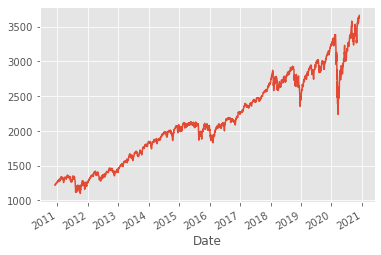

time: 323 ms


In [3]:
data['Adj Close'].plot();

In [4]:
prices = data['Adj Close']
volumes = data['Volume']

time: 1.72 ms


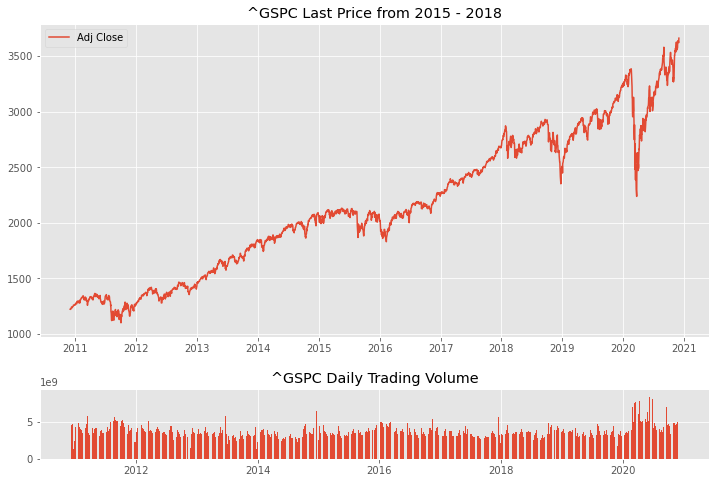

time: 6.47 s


In [5]:
# The top plot consisting of dailing closing prices
top = plt.subplot2grid((4, 4), (0, 0), rowspan=3, colspan=4)
top.plot(prices.index, prices, label='Adj Close')
plt.title(f'{stock} Last Price from 2015 - 2018')
plt.legend(loc=2)

# The bottom plot consisting of daily trading volume
bottom = plt.subplot2grid((4, 4), (3,0), rowspan=1, colspan=4)
bottom.bar(volumes.index, volumes)
plt.title(f'{stock} Daily Trading Volume')

plt.gcf().set_size_inches(12, 8)
plt.subplots_adjust(hspace=0.75);

[*********************100%***********************]  1 of 1 completed


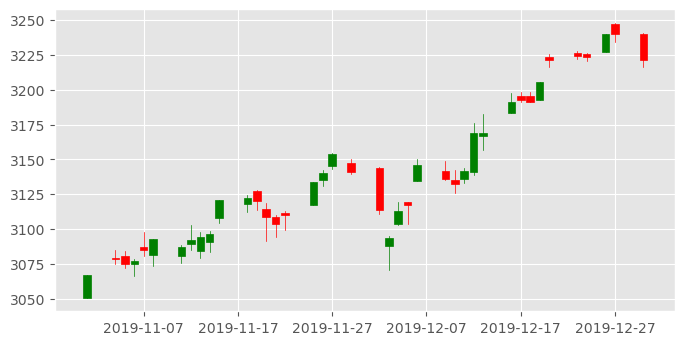

time: 695 ms


In [13]:
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
%matplotlib inline

df_subset = yf.download(stock, start = '2019-11-01', end = '2019-12-31', interval = '1d')

df_subset['Date'] = df_subset.index.map(mdates.date2num)
df_ohlc = df_subset[['Date','Open', 'High', 'Low', 'Adj Close']]

figure, ax = plt.subplots(figsize = (8,4), dpi = 100)
formatter = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(formatter)
candlestick_ohlc(
    ax,
    df_ohlc.values,
    width=0.8,
    colorup='green',
    colordown='red'
);

# plot returns

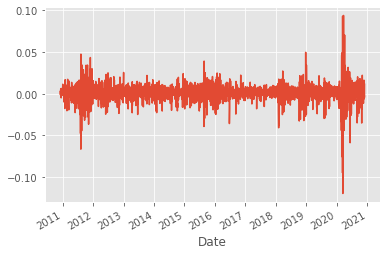

time: 304 ms


In [14]:
daily_changes = data['Adj Close'].pct_change(periods=1)
daily_changes.plot(); 

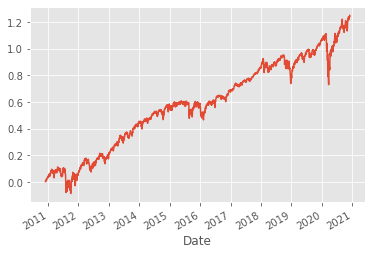

time: 279 ms


In [15]:
# cumulative 
 
df_cumsum = daily_changes.cumsum()
df_cumsum.plot();

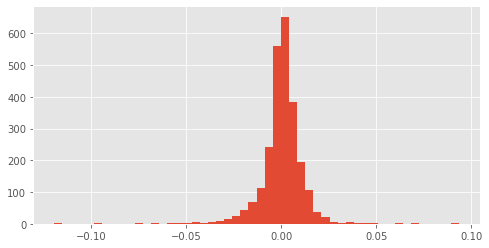

time: 360 ms


In [16]:
daily_changes.hist(bins=50, figsize=(8, 4));

In [17]:
daily_changes.describe()

count    2516.000000
mean        0.000497
std         0.010985
min        -0.119841
25%        -0.003346
50%         0.000661
75%         0.005277
max         0.093828
Name: Adj Close, dtype: float64

time: 6.1 ms


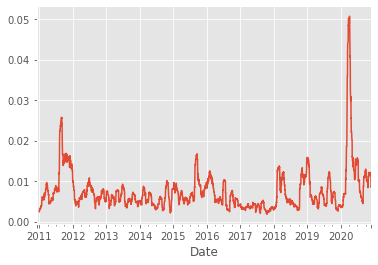

time: 585 ms


In [18]:
# volatility

df_filled = data['Adj Close'].asfreq('D', method='ffill')
df_returns = df_filled.pct_change()
df_std = df_returns.rolling(window=30, min_periods=30).std()
df_std.plot();

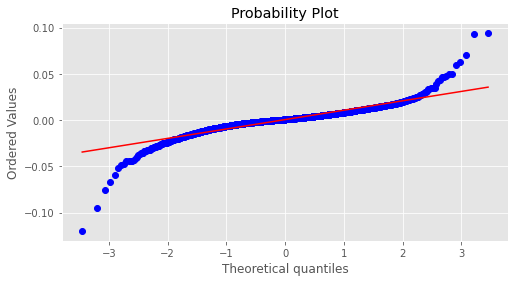

time: 360 ms


In [19]:
# PROBABILITY PLOT:

daily_changes = data.pct_change(periods=1).dropna()

figure = plt.figure(figsize=(8,4))

ax = figure.add_subplot(111)
stats.probplot(daily_changes['Adj Close'], dist='norm', plot=ax)
plt.show();

In [43]:
stocks = ['^GSPC', '^IXIC', '^DJI', 'RTY=F']
stocks_df = yf.download(stocks, period = '10y', interval = '1d')['Adj Close']
stocks_df.to_csv('data/new/index_history_10y.csv')

[*********************100%***********************]  4 of 4 completed
time: 550 ms


In [44]:
stocks_df = pd.read_csv('data/new/index_history_10y.csv', index_col='Date')
stocks_df.columns = ['Russell2000', 'DOW', 'SP500','NASDAQ']
stocks_df = stocks_df.fillna(0);

time: 9.53 ms


In [45]:
stocks_df.tail()

,Russell2000,DOW,SP500,NASDAQ
Date,,,,
2020-11-25,1844.599976,29872.470703,3629.649902,12094.400391
2020-11-27,0.000000,29910.369141,3638.350098,12205.849609
2020-11-30,1820.099976,29638.640625,3621.629883,12198.740234
2020-12-01,1835.500000,29823.919922,3662.449951,12355.110352
2020-12-02,1834.500000,0.000000,0.000000,0.000000


time: 7.26 ms


In [46]:
stocks_df.pct_change().corr()

,Russell2000,DOW,SP500,NASDAQ
Russell2000,1.000000,-0.027930,-0.028294,-0.028318
DOW,-0.027930,1.000000,0.999952,0.999771
SP500,-0.028294,0.999952,1.000000,0.999895
NASDAQ,-0.028318,0.999771,0.999895,1.000000


time: 11.3 ms


In [47]:
stocks_df.cov()

,Russell2000,DOW,SP500,NASDAQ
Russell2000,5.566338e+05,2.113000e+06,2.385477e+05,1.016215e+06
DOW,2.113000e+06,4.647240e+07,5.363801e+06,1.671035e+07
SP500,2.385477e+05,5.363801e+06,6.264080e+05,1.972469e+06
NASDAQ,1.016215e+06,1.671035e+07,1.972469e+06,6.536158e+06


time: 8.9 ms


# MOVING AVERAGES - SIMPLE & EXPONENTIAL

SIMPLE MOVING AVERAGE


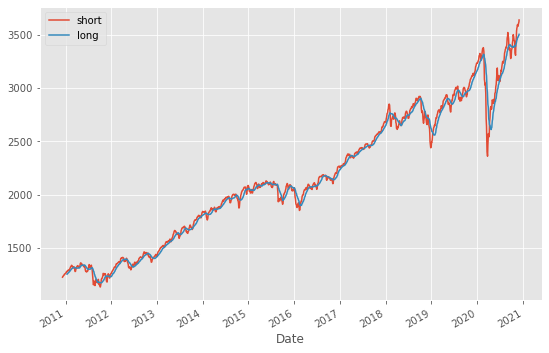

time: 279 ms


In [39]:
print('SIMPLE MOVING AVERAGE')

df_filled = data.asfreq('D', method='ffill')
df_last = data['Adj Close']

series_short = df_last.rolling(window=5, min_periods=5).mean()
series_long = df_last.rolling(window=30, min_periods=30).mean()

df_sma = pd.DataFrame(columns=['short', 'long'])
df_sma['short'] = series_short
df_sma['long'] = series_long
df_sma.plot(figsize=(9, 6));

EXPONENTIAL MOVING AVERAGE


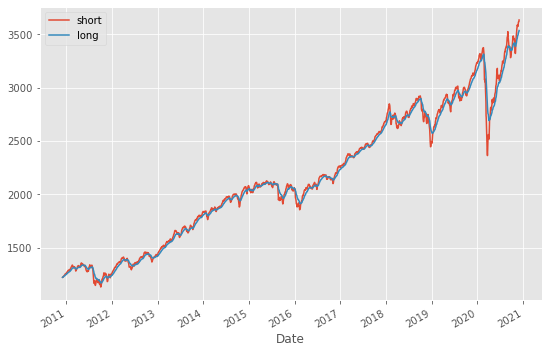

time: 466 ms


In [38]:
print('EXPONENTIAL MOVING AVERAGE')

df_filled = df.asfreq('D')
df_last = data['Adj Close']

series_short = df_last.ewm(span=5).mean()
series_long = df_last.ewm(span=30).mean()

df_sma = pd.DataFrame(columns=['short', 'long'])
df_sma['short'] = series_short
df_sma['long'] = series_long
df_sma.plot(figsize=(9, 6));

# The capital asset pricing model and the security market line

In [53]:
""" 
Linear regression with SciPy 
"""
from scipy import stats

stock_returns = [0.065, 0.0265, -0.0593, -0.001, 0.0346]
mkt_returns = [0.055, -0.09, -0.041, 0.045, 0.022]
beta, alpha, r_value, p_value, std_err = \
    stats.linregress(stock_returns, mkt_returns)

' \nLinear regression with SciPy \n'

time: 5.71 ms


In [55]:
print(beta, alpha)

0.5077431878770808 -0.008481900352462384
time: 1.02 ms


In [56]:
""" 
Least squares regression with statsmodels 
"""
import numpy as np
import statsmodels.api as sm

# Generate some sample data
num_periods = 9
all_values = np.array([np.random.random(8) \
                       for i in range(num_periods)])

# Filter the data
y_values = all_values[:, 0] # First column values as Y
x_values = all_values[:, 1:] # All other values as X
x_values = sm.add_constant(x_values) # Include the intercept
results = sm.OLS(y_values, x_values).fit() # Regress and fit the model

print(results.summary())

' \nLeast squares regression with statsmodels \n'

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     3.035
Date:                Wed, 02 Dec 2020   Prob (F-statistic):              0.416
Time:                        01:06:02   Log-Likelihood:                 13.200
No. Observations:                   9   AIC:                            -10.40
Df Residuals:                       1   BIC:                            -8.822
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.4159      1.591     -1.518      0.3

In [57]:
print(results.params)

[-2.41589041  2.9577032   2.16179839 -0.02323918 -0.98155937  0.16685427
 -0.78604145  2.4286504 ]
time: 1.29 ms


# Linear optimization

In [58]:
""" 
A linear optimization problem with 2 variables
"""
import pulp

x = pulp.LpVariable('x', lowBound=0)
y = pulp.LpVariable('y', lowBound=0)

problem = pulp.LpProblem(
    'A simple maximization objective', 
    pulp.LpMaximize)
problem += 3*x + 2*y, 'The objective function'
problem += 2*x + y <= 100, '1st constraint'
problem += x + y <= 80, '2nd constraint'
problem += x <= 40, '3rd constraint'
problem.solve()

' \nA linear optimization problem with 2 variables\n'

1

time: 53.2 ms


In [59]:
print("Maximization Results:")
for variable in problem.variables():
    print(variable.name, '=', variable.varValue)

Maximization Results:
x = 20.0
y = 60.0
time: 1.96 ms


In [60]:
""" 
An example of implementing an integer 
programming model with binary conditions 
"""
import pulp

dealers = ['X', 'Y', 'Z']
variable_costs = {'X': 500, 'Y': 350, 'Z': 450}
fixed_costs = {'X': 4000, 'Y': 2000, 'Z': 6000}

# Define PuLP variables to solve
quantities = pulp.LpVariable.dicts('quantity', 
                                   dealers, 
                                   lowBound=0,
                                   cat=pulp.LpInteger)
is_orders = pulp.LpVariable.dicts('orders', 
                                  dealers,
                                  cat=pulp.LpBinary)

' \nAn example of implementing an integer \nprogramming model with binary conditions \n'

time: 6.49 ms


In [61]:
"""
This is an example of implementing an 
IP model with binary variables the correct way.
"""
# Initialize the model with constraints
model = pulp.LpProblem('A cost minimization problem',
                       pulp.LpMinimize)
model += sum(
    [variable_costs[i]*quantities[i] + \
         fixed_costs[i]*is_orders[i] for i in dealers])\
    , 'Minimize portfolio cost'
model += sum([quantities[i] for i in dealers]) == 150\
    ,  'Total contracts required'
model += is_orders['X']*30 <= quantities['X'] <= \
    is_orders['X']*100, 'Boundary of total volume of X'
model += is_orders['Y']*30 <= quantities['Y'] <= \
    is_orders['Y']*90, 'Boundary of total volume of Y'
model += is_orders['Z']*30 <= quantities['Z'] <= \
    is_orders['Z']*70, 'Boundary of total volume of Z'
model.solve()

'\nThis is an example of implementing an \nIP model with binary variables the correct way.\n'

1

time: 34.4 ms


In [62]:
print('Minimization Results:')
for variable in model.variables():
    print(variable, '=', variable.varValue)

print('Total cost:',  pulp.value(model.objective))

Minimization Results:
orders_X = 0.0
orders_Y = 1.0
orders_Z = 1.0
quantity_X = 0.0
quantity_Y = 90.0
quantity_Z = 60.0
Total cost: 66500.0
time: 4.41 ms


# statistical analysis of TS

### download components:

In [63]:
stock = tickers_sp500()
stock[61], stock[71] = 'BF-B','BRK-B'


df_components = yf.download(stock, start = '2017-01-03', end = '2019-12-30', interval = '1d', parse_dates = True, index_col=0)['Adj Close']
# df_components = df_components.iloc[1:-1]
df_components.head()

[*********************100%***********************]  505 of 505 completed

4 Failed downloads:
- VNT: Data doesn't exist for startDate = 1483426800, endDate = 1577689200
- CARR: Data doesn't exist for startDate = 1483426800, endDate = 1577689200
- OTIS: Data doesn't exist for startDate = 1483426800, endDate = 1577689200
- LUMN: No data found for this date range, symbol may be delisted


,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,ADI,ADM,ADP,ADSK,AEE,...,WST,WU,WY,WYNN,XEL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-03,44.974556,44.741226,168.355179,27.277639,51.220478,76.909164,112.360001,36.294086,108.988495,103.480003,67.051659,40.647903,95.367126,76.180000,47.134960,...,82.408440,19.068991,26.352428,81.032707,36.374241,55.070808,74.296684,56.888531,23.787016,47.210743,58.928459,100.255760,86.250000,39.293274,52.256729
2017-01-04,45.564671,45.127758,169.736740,27.247108,51.942707,78.817696,115.739998,36.582207,109.250534,104.139999,66.912941,40.577499,95.514565,77.519997,47.188942,...,83.614113,19.450897,26.586782,83.645470,36.535435,54.669926,73.479240,57.354347,24.684637,47.914391,59.142868,101.177498,87.029999,39.857468,52.763794
2017-01-05,45.022934,44.345032,169.618347,27.385668,52.336643,77.905327,114.809998,36.898209,107.612801,105.910004,65.951233,40.278290,94.943260,76.930000,47.422916,...,83.349442,19.364098,26.864544,84.720230,36.535435,54.007980,72.383888,56.607086,24.581066,47.476990,59.338650,101.827568,84.750000,39.211372,52.588257
2017-01-06,46.425671,44.654255,167.397919,27.690971,52.353065,78.948051,115.419998,37.901989,108.838760,108.300003,66.210159,39.354282,95.007774,79.300003,47.782860,...,84.917824,19.589764,26.777744,85.637459,36.642887,55.052166,72.343018,56.568279,24.201303,47.144192,60.056496,101.837265,85.959999,39.466175,52.754028
2017-01-09,46.570778,45.494972,167.299271,27.944603,52.697758,79.581116,117.110001,37.864819,107.622154,108.570000,66.524574,39.380680,94.418060,79.589996,46.784016,...,85.123672,19.572407,26.881907,85.933945,36.087696,55.061493,71.149574,56.742973,24.063204,46.944500,60.224304,103.816566,85.970001,39.038479,52.607777


time: 35.7 s


In [64]:
filled_df_components = df_components.fillna(method='ffill')
daily_df_components = filled_df_components.resample('24h').ffill()
daily_df_components = daily_df_components.fillna(method='bfill')
daily_df_components = daily_df_components.fillna(0)

time: 12.6 ms


In [65]:
stock = '^GSPC'

df = yf.download(stock, period = '10y', interval = '1d', parse_dates = True, index_col=0)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-12-02,1206.810059,1221.890015,1206.810059,1221.530029,1221.530029,4970800000
2010-12-03,1219.930054,1225.569946,1216.819946,1224.709961,1224.709961,3735780000
2010-12-06,1223.869995,1225.800049,1220.670044,1223.119995,1223.119995,3527370000
2010-12-07,1227.250000,1235.050049,1223.250000,1223.750000,1223.750000,6970630000
2010-12-08,1225.020020,1228.930054,1219.500000,1228.280029,1228.280029,4607590000


time: 418 ms


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2010-12-02 to 2020-12-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2517 non-null   float64
 1   High       2517 non-null   float64
 2   Low        2517 non-null   float64
 3   Close      2517 non-null   float64
 4   Adj Close  2517 non-null   float64
 5   Volume     2517 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 137.6 KB
time: 8.11 ms


In [67]:
df.index

DatetimeIndex(['2010-12-02', '2010-12-03', '2010-12-06', '2010-12-07',
               '2010-12-08', '2010-12-09', '2010-12-10', '2010-12-13',
               '2010-12-14', '2010-12-15',
               ...
               '2020-11-17', '2020-11-18', '2020-11-19', '2020-11-20',
               '2020-11-23', '2020-11-24', '2020-11-25', '2020-11-27',
               '2020-11-30', '2020-12-01'],
              dtype='datetime64[ns]', name='Date', length=2517, freq=None)

time: 2.83 ms


In [68]:
import pandas as pd

# Prepare the dataframe
df_sp = pd.DataFrame(df['Adj Close'])
df_sp.columns = ['SP500']
df_sp.index = pd.to_datetime(df_sp.index)

# Trim the new dataframe and resample
sp_2017 = pd.DataFrame(df_sp.loc['2017-01-03':'2019-12-30'])
sp_2017 = sp_2017.resample('24h').ffill()

time: 13.6 ms


# Applying a Kernel Principal Component Analysis

## Finding Eigenvectors and Eigenvalues

In [69]:
df_z_components = daily_df_components.apply(lambda x: (x - x.mean()) / x.std())

time: 338 ms


In [70]:
df_z_components = df_z_components.fillna(0)

time: 3.27 ms


In [71]:
np.any(np.isnan(df_z_components))

False

time: 4.11 ms


In [72]:
np.all(np.isfinite(df_z_components))

True

time: 3.84 ms


In [73]:
from sklearn.decomposition import KernelPCA

fitted_pca = KernelPCA()
fitted_pca.fit(df_z_components)

KernelPCA()

time: 156 ms


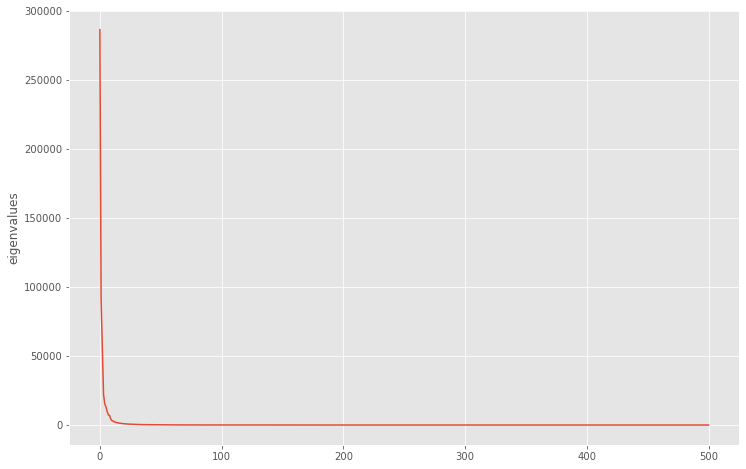

time: 324 ms


In [74]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (12,8)
plt.plot(fitted_pca.lambdas_)
plt.ylabel('eigenvalues')
plt.show();

In [75]:
fn_weighted_avg = lambda x: x / x.sum()
weighted_values = fn_weighted_avg(fitted_pca.lambdas_)[:5]

time: 1.26 ms


In [76]:
print(weighted_values)

[0.52389705 0.16595833 0.1023099  0.04037565 0.02806121]
time: 1.61 ms


In [77]:
weighted_values.sum()

0.8606021421145824

time: 2.09 ms


## Reconstructing the Dow Index with PCA

In [78]:
import numpy as np

daily_df_components = daily_df_components.fillna(0)

kernel_pca = KernelPCA(n_components = 5).fit(df_z_components)
pca_5 = kernel_pca.transform(daily_df_components)

weights = fn_weighted_avg(kernel_pca.lambdas_)
reconstructed_values = np.dot(pca_5, weights)

# Combine DJIA and PCA index for comparison
df_combined = sp_2017.copy()
df_combined['pca_5'] = reconstructed_values
df_combined = df_combined.apply(fn_z_score)
df_combined.plot(figsize=(12, 8))
plt.legend();

NameError: name 'fn_z_score' is not defined

In [ ]:
df_settle = df['Adj Close'].resample('MS').ffill().dropna()

df_rolling = df_settle.rolling(12)
df_mean = df_rolling.mean()
df_std = df_rolling.std()

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(df_settle, label='Original')
plt.plot(df_mean, label='Mean')
plt.legend();

In [ ]:
df_std.plot(figsize=(12, 8));

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_settle)
print('ADF statistic: ',  result[0])
print('p-value:', result[1])

critical_values = result[4]
for key, value in critical_values.items():
    print('Critical value (%s): %.3f' % (key, value))

# make stationary

In [ ]:
import numpy as np

df_log = np.log(df_settle)

In [ ]:
df_log_ma= df_log.rolling(2).mean()
df_detrend = df_log - df_log_ma
df_detrend.dropna(inplace=True)

# Mean and standard deviation of detrended data
df_detrend_rolling = df_detrend.rolling(12)
df_detrend_ma = df_detrend_rolling.mean()
df_detrend_std = df_detrend_rolling.std()

# Plot
plt.figure(figsize=(12, 8))
plt.plot(df_detrend, label='Detrended')
plt.plot(df_detrend_ma, label='mean')
plt.plot(df_detrend_std, label='std')
plt.legend(loc='upper right');

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_detrend)
print('ADF statistic: ', result[0])
print('p-value: %.5f' % result[1])

critical_values = result[4]
for key, value in critical_values.items():
    print('Critical value (%s): %.3f' % (key, value))

In [ ]:
# remove trend by differencing

In [ ]:
df_log_diff = df_log.diff(periods=3).dropna()

# Mean and standard deviation of differenced data
df_diff_rolling = df_log_diff.rolling(12)
df_diff_ma = df_diff_rolling.mean()
df_diff_std = df_diff_rolling.std()

# Plot the stationary data
plt.figure(figsize=(12, 8))
plt.plot(df_log_diff, label='Differenced')
plt.plot(df_diff_ma, label='mean')
plt.plot(df_diff_std, label='std')
plt.legend(loc='upper right');

In [ ]:
print('ADF statistic:', result[0])
print('p-value: %.5f' % result[1])

critical_values = result[4]
for key, value in critical_values.items():
    print('Critical value (%s): %.3f' % (key, value))

# seasonal decomp

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_result = seasonal_decompose(df_log.dropna(), freq=12)

df_trend = decompose_result.trend
df_season = decompose_result.seasonal
df_residual = decompose_result.resid

In [ ]:
plt.rcParams["figure.figsize"] = (12, 8)
fig = decompose_result.plot()

In [ ]:
df_log_diff = df_residual.diff().dropna()

# Mean and standard deviation of differenced data
df_diff_rolling = df_log_diff.rolling(12)
df_diff_ma = df_diff_rolling.mean()
df_diff_std = df_diff_rolling.std()

# Plot the stationary data
plt.figure(figsize=(12, 8))
plt.plot(df_log_diff, label='Differenced')
plt.plot(df_diff_ma, label='Mean')
plt.plot(df_diff_std, label='Std')
plt.legend();

In [ ]:
result = adfuller(df_residual.dropna())

print('ADF statistic:',  result[0])
print('p-value: %.5f' % result[1])

critical_values = result[4]
for key, value in critical_values.items():
    print('Critical value (%s): %.3f' % (key, value))

# Forecasting and Predicting a Time Series

### finding model parameters by grid search

In [ ]:
import itertools    
import warnings
from statsmodels.tsa.statespace.sarimax import SARIMAX

warnings.filterwarnings("ignore")

def arima_grid_search(dataframe, s):
    p = d = q = range(2)
    param_combinations = list(itertools.product(p, d, q))

    lowest_aic, pdq, pdqs = None, None, None

    total_iterations = 0
    for order in param_combinations:    
        for (p, q, d) in param_combinations:
            seasonal_order = (p, q, d, s)
            total_iterations += 1
            try:
                model = SARIMAX(df_settle, order=order, 
                    seasonal_order=seasonal_order, 
                    enforce_stationarity=False,
                    enforce_invertibility=False,
                    disp=False
                )
                model_result = model.fit(maxiter=200, disp=False)

                if not lowest_aic or model_result.aic < lowest_aic:
                    lowest_aic = model_result.aic
                    pdq, pdqs = order, seasonal_order

            except Exception as ex:
                continue

    return lowest_aic, pdq, pdqs 

In [ ]:
lowest_aic, order, seasonal_order = arima_grid_search(df_settle, 12)

In [95]:
print('ARIMA{}x{}'.format(order, seasonal_order))
print('Lowest AIC: %.3f'%lowest_aic)

ARIMA(1, 1, 1)x(1, 1, 1, 12)
Lowest AIC: 1154.213
time: 1.07 ms


# fitting sarimax model

In [96]:
model = SARIMAX(
    df_settle,
    order=order,
    seasonal_order=seasonal_order,
    enforce_stationarity=False,
    enforce_invertibility=False,
    disp=False
)

model_results = model.fit(maxiter=200, disp=False)

time: 354 ms


In [97]:
print(model_results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                          Adj Close   No. Observations:                  120
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -572.106
Date:                            Wed, 02 Dec 2020   AIC                           1154.213
Time:                                    01:06:56   BIC                           1166.876
Sample:                                01-01-2011   HQIC                          1159.326
                                     - 12-01-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7874      0.083      9.522      0.000       0.625       0.949
ma.L1         -1.0166      0.103   

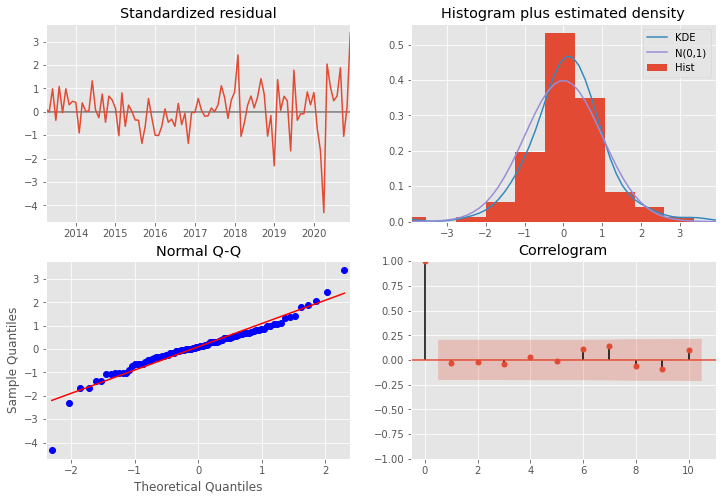

time: 989 ms


In [98]:
model_results.plot_diagnostics(figsize=(12, 8));

In [99]:
model_results.resid.describe()

count     120.000000
mean        9.643337
std       173.419619
min      -566.981144
25%       -51.616692
50%         4.139945
75%        64.472422
max      1257.640015
dtype: float64

time: 6.75 ms


# predicting the model

In [120]:
n = len(df_settle.index)
prediction = model_results.get_prediction(
    start = n - 12*7, 
    end = n + 5
)
prediction_ci = prediction.conf_int()

time: 13.1 ms


In [121]:
print(prediction_ci.tail(3))

            lower Adj Close  upper Adj Close
2021-04-01      3130.145760      3805.501343
2021-05-01      3138.206496      3840.263006
2021-06-01      3006.646913      3726.422507
time: 3.15 ms


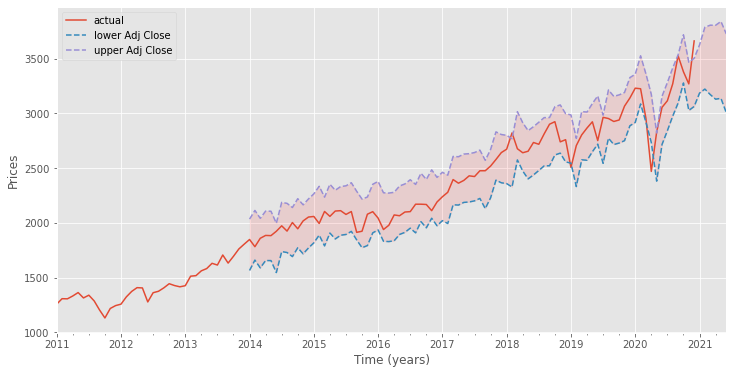

time: 403 ms


In [122]:
plt.figure(figsize=(12, 6))

ax = df_settle['2011':].plot(label='actual')
prediction_ci.plot(
    ax=ax, style=['--', '--'],
    label='predicted/forecasted')

ci_index = prediction_ci.index
lower_ci = prediction_ci.iloc[:, 0]
upper_ci = prediction_ci.iloc[:, 1]

ax.fill_between(ci_index, lower_ci, upper_ci,
    color='r', alpha=.1)

ax.set_xlabel('Time (years)')
ax.set_ylabel('Prices')

plt.legend();

In [148]:
actual_close = list(yf.download(stock, start = '2014-01-01', interval = '1mo')['Adj Close'])

ranger = len(prediction_ci) - len(actual_close)
for n in range(ranger):
    actual_close.append(0)

pdf = pd.DataFrame(prediction_ci)
pdf['Actual'] = actual_close
pdf['off_Upper'] = -(pdf['upper Adj Close'] - pdf['Actual']) / pdf['Actual'] * 100
pdf['off_loser'] = -(pdf['lower Adj Close'] - pdf['Actual']) / pdf['Actual'] * 100


print(f'\n   Today = {df_settle[-1]}')
print(f'   Prediction:')
pdf.tail(18)

[*********************100%***********************]  1 of 1 completed

   Today = 3662.449951171875
   Prediction:


,lower Adj Close,upper Adj Close,Actual,off_Upper,off_loser
2020-01-01,2917.771369,3357.990169,3225.520020,-4.106939,9.541055
2020-02-01,3086.571834,3526.771643,2954.219971,-19.380807,-4.480095
2020-03-01,2919.977901,3360.159535,2584.590088,-30.007445,-12.976441
2020-04-01,2734.134228,3174.298365,2912.429932,-8.991407,6.121888
2020-05-01,2381.501145,2821.648432,3044.310059,7.314026,21.772057
2020-06-01,2716.828891,3156.959945,3100.290039,-1.827890,12.368557
2020-07-01,2842.368873,3282.484288,3271.120117,-0.347409,13.107169
2020-08-01,2976.013208,3416.113554,3500.310059,2.405401,14.978583
2020-09-01,3095.072466,3535.158290,3363.000000,-5.119188,7.966920
2020-10-01,3278.528294,3718.600124,3269.959961,-13.720051,-0.262032


time: 541 ms


In [7]:
stocks = ['^GSPC', '^IXIC', '^DJI', 'RTY=F']

data = yf.download(stocks, period = '2y', interval = '1d', parse_dates = True, index_col=0)['Adj Close']
data.columns = ['Russel2000', 'DOW','SP500','NASDAQ']
data.to_csv('data/new/4index_2y_1d.csv')
data.head()

[*********************100%***********************]  4 of 4 completed


,Russel2000,DOW,SP500,NASDAQ
Date,,,,
2018-12-02,1557.599976,NaN,NaN,NaN
2018-12-03,1547.800049,25826.429688,2790.370117,7441.509766
2018-12-04,1481.900024,25027.070312,2700.060059,7158.430176
2018-12-06,1475.300049,24947.669922,2695.949951,7188.259766
2018-12-07,1450.099976,24388.949219,2633.080078,6969.250000


time: 611 ms


In [36]:
sp = pd.DataFrame(data['SP500'])
dow = data['DOW']

sp = sp.fillna(0)
dow = dow.fillna(0)

time: 2.98 ms


In [37]:
from sklearn.linear_model import LinearRegression

class LinearRegressionModel(object):
    def __init__(self):
        self.df_result = pd.DataFrame(columns=['Actual', 'Predicted'])

    def get_model(self):
        return LinearRegression(fit_intercept=False)

    def learn(self, df, ys, start_date, end_date, lookback_period=20):
        model = self.get_model()

        for date in df[start_date:end_date].index:
            # Fit the model
            x = self.get_prices_since(df, date, lookback_period)
            y = self.get_prices_since(ys, date, lookback_period)
            model.fit(x, y.ravel())

            # Predict the current period
            x_current = df.loc[date].values
            [y_pred] = model.predict([x_current])

            # Store predictions
            new_index = pd.to_datetime(date, format='%Y-%m-%d')
            y_actual = ys.loc[date]
            self.df_result.loc[new_index] = [y_actual, y_pred]

    def get_prices_since(self, df, date_since, lookback):
        index = df.index.get_loc(date_since)
        return df.iloc[index-lookback:index]

time: 22.8 ms


In [38]:
linear_reg_model = LinearRegressionModel()

linear_reg_model.learn(sp, dow, start_date='2018', end_date='2019', lookback_period=20)

ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.

In [28]:
sp.shape

(595, 1)

time: 3.53 ms


In [29]:
dow.shape

(595,)

time: 2.49 ms
